# Метод k ближайших соседей

### Сформируем данные

In [42]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.rcParams['pcolor.shading'] ='auto'

In [6]:
def generateRandomCluster(xCenter, yCenter, pointsInCluster, sugma, clusterNumber):
    """
    Функция формирует набор случайных pointsInCluster точек вокруг центра xCenter, yCenter со стандартным отклонением sigma
    Для удобства сразу приписываем номер кластера clusterNumber
    
    Пример
    generateRandomCluster(50, 50, 5, 1, 1)
    [ (49.4383741073746, 50.759631072447775, 1),
     (50.382663637239496, 51.958511415275346, 1),
     (51.35861614413671, 50.14508008851586, 1),
     (49.99654565817289, 48.868625830102836, 1),
     (48.90429842105296, 50.30684883451077, 1) ]
    """
    clusterData = []
    for point in range(pointsInCluster):
        clusterData.append((random.gauss(xCenter, sigma), random.gauss(yCenter, sigma), clusterNumber))
        
    return clusterData

In [7]:
def generateNClusters(clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma):
    """
    Функция генерит clustersNumber кластеров в прелелах (x, y) координат от minCoordinate до minCoordinate + maxLength
        
    Пример
    generateNClusters( 3, 0, 100, 5, 1 )
    
    [
        [ (30.101595428493244, 97.81846577317793, 0),
          (30.982265309141784, 94.85561016707207, 0),
          (29.324361801401345, 96.13225349356063, 0),
          (28.55314432177591, 97.71789084567285, 0),
          (30.925804186398505, 97.73651238892455, 0)],
        [ (35.42172429469604, 62.868371107151994, 1),
          (36.36575870693403, 60.81612414265114, 1),
          (36.3958015730347, 60.845554677754464, 1),
          (35.29157575130411, 63.179905869433654, 1),
          (38.19703749175945, 61.839734328145795, 1)],
        [ (92.22845587073014, 40.18055397530009, 2),
          (90.7642755825596, 40.68519067128221, 2),
          (92.27913966714033, 39.604710170714505, 2),
          (93.57420210013105, 40.20564381974239, 2),
          (92.33724850339567, 40.261922276131735, 2)]
    ]
    """
    clustersData = []
    for cluster in range(clustersNumber):
        clustersData.append(generateRandomCluster(minCoordinate + maxLength * random.random(),
                                                  minCoordinate + maxLength * random.random(),
                                                  pointsInCluster,
                                                  sigma, cluster))
    return clustersData

In [8]:
def drawClusters(clustersData):
    """
    Функция рисует набор кластеров по данным clustersData
    """
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append(point[0])
            yData.append(point[1])
            colors.append(point[2])
        
        plt.scatter(xData, yData, label = colors[0])
        
    plt.legend(loc='upper right')
    plt.show()

In [9]:
clustersNumber = 3
minCoordinate = 0
maxLength = 100
pointsInCluster = 15
sigma = 5

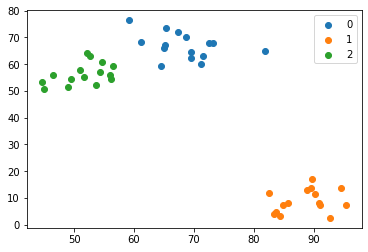

In [10]:
data = generateNClusters(clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma)
drawClusters(data)

### Строим модель

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier(n_neighbors=3)

In [14]:
X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append([point[0], point[1]])
        Y.append(point[2])

In [16]:
model.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [38]:
def KNeighbors(clustersData, model):
    """
    Визуализация результатов классификации
    """
    step = 1
    xx, yy = np.meshgrid(np.arange(minCoordinate, minCoordinate + maxLength, step),
                         np.arange(minCoordinate, minCoordinate + maxLength, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append(point[0])
            yData.append(point[1])
            colors.append(point[2])
        
        plt.scatter(xData, yData, label = colors[0])
    plt.legend(loc='best')
    
    plt.show()

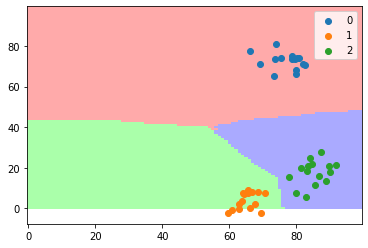

In [43]:
data = generateNClusters(clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma)

X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append([point[0], point[1]])
        Y.append(point[2])
        
model.fit(X, Y)

KNeighbors(data, model)

 ## Подсчет манхэттенского расстояния в игре "Пятнашки"

In [44]:
correct_position = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 0],
]

In [45]:
current_position = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 0, 14, 15],
]

In [48]:
def make_positions_dict(position):
    """
    Формирование словаря координат чисел.
    
    Пример
    make_position_dict(correct_position)
    {
        1: [1, 1],
        2: [1, 2],
        ...
        14: [4, 2],
        15: [4, 3]
    }
    """
    position_dict = {}
    
    row_number = 1
    for row_list in position:
            
        column_number =1
        for column in row_list:
            if column != 0:
                position_dict[column] = [row_number, column_number]
                
            column_number += 1
            
        row_number += 1
        
    return position_dict

In [49]:
correct_dict = make_positions_dict(correct_position)
correct_dict

{1: [1, 1],
 2: [1, 2],
 3: [1, 3],
 4: [1, 4],
 5: [2, 1],
 6: [2, 2],
 7: [2, 3],
 8: [2, 4],
 9: [3, 1],
 10: [3, 2],
 11: [3, 3],
 12: [3, 4],
 13: [4, 1],
 14: [4, 2],
 15: [4, 3]}

In [51]:
current_dict = make_positions_dict(current_position)
current_dict

{1: [1, 1],
 2: [1, 2],
 3: [1, 3],
 4: [1, 4],
 5: [2, 1],
 6: [2, 2],
 7: [2, 3],
 8: [2, 4],
 9: [3, 1],
 10: [3, 2],
 11: [3, 3],
 12: [3, 4],
 13: [4, 1],
 14: [4, 3],
 15: [4, 4]}

In [83]:
dist = 0
for key, coord in correct_dict.items():
    print(key, coord, current_dict[key], np.abs(coord[0] - current_dict[key][0]), abs(coord[1] - current_dict[key][1]))
    dist += abs(coord[0] - current_dict[key][0]) + np.abs(coord[1] - current_dict[key][1])

1 [1, 1] [1, 1] 0 0
2 [1, 2] [1, 2] 0 0
3 [1, 3] [1, 3] 0 0
4 [1, 4] [1, 4] 0 0
5 [2, 1] [2, 1] 0 0
6 [2, 2] [2, 2] 0 0
7 [2, 3] [2, 3] 0 0
8 [2, 4] [2, 4] 0 0
9 [3, 1] [3, 1] 0 0
10 [3, 2] [3, 2] 0 0
11 [3, 3] [3, 3] 0 0
12 [3, 4] [3, 4] 0 0
13 [4, 1] [4, 1] 0 0
14 [4, 2] [4, 3] 0 1
15 [4, 3] [4, 4] 0 1


In [84]:
dist

2

# Поиск наиболее близкого имени участника

## Расстояние Левенштейна

In [85]:
# conda install -c conda-forge python-levenshtein
# или pip install python-levenshtein

import Levenshtein

In [86]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [87]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

### С библиотекой Levenshtein

In [88]:
Levenshtein.distance('Оксана', 'Анна')

4

In [151]:
for recognized_name in speech_recognition:
    for real_name in claim_list:
        result = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    print(result)
    
    break

{'Шехавцова Анна': 11, 'Гречихина Наталья': 14, 'Козлова Алена': 11, 'Груздева Алина': 10, 'Кущенко Анна': 5, 'Чистякова Анастасия': 15}


In [154]:
# x[1] - сортировка по значениям словаря по возрастанию (если надо по убыванию - добавляем минус перед x[1])
# x[0] - сортировка по ключам
sorted(result.items(), key=lambda x: x[1])

[('Кущенко Анна', 5),
 ('Груздева Алина', 10),
 ('Шехавцова Анна', 11),
 ('Козлова Алена', 11),
 ('Гречихина Наталья', 14),
 ('Чистякова Анастасия', 15)]

# Пример использования коэффициента Жаккара

In [157]:
import pandas as pd

Данные по ценам на товары

In [158]:
prices = pd.read_csv('datasets/ids_and_prices.csv')
prices.head()

,id,price
0,b000jz4hqo,0.00
1,b0006zf55o,0.00
2,b00004tkvy,0.00
3,b000g80lqo,599.99
4,b0006se5bq,99.99


In [159]:
details = pd.read_csv('datasets/ids_and_details.csv')
details.head()

,id,name,description,manufacturer
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN
1,b00004tkvy,the beginners bible: noah's ark activity cente...,NaN,NaN
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN


Проверим на наличие дубликатов

Они есть

In [161]:
details['id'].value_counts().sort_values(ascending=False).head()

b00006jo4g    5
b0009i5sgy    4
b00002s5ig    4
b000067fk7    4
b0009hj5ve    4
Name: id, dtype: int64

In [162]:
details.drop_duplicates(subset='id', keep='first', inplace=True)

In [164]:
# Проверим, что дубликатов нет
details['id'].value_counts().sort_values(ascending=False).head()

b000jz4hqo    1
b000i82j80    1
b0006se5bq    1
b00021xhzw    1
b0000dbykm    1
Name: id, dtype: int64

In [166]:
# для пустых описаний NaN подставим пустую строку
# это изменит тип ячейки (с числовой на строковую) и позволит избежать в дальнейшем ошибки

details['description'].fillna('', inplace=True)
details.head()

,id,name,description,manufacturer
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN


In [168]:
data = details.merge(prices, on='id', how='left')
data.head()

,id,name,description,manufacturer,price
0,b000jz4hqo,clickart 950000 - premier image pack (dvd-rom),massive collection of images & fonts for all y...,NaN,0.00
1,b00004tkvy,the beginners bible: noah's ark activity cente...,,NaN,0.00
2,b000g80lqo,sage (ptree) - vernfp2007rt - premium accounti...,if you're like most nonprofit organizations yo...,NaN,599.99
3,b0006se5bq,singing coach unlimited - electronic learning ...,learn to sing with the help of a patented real...,NaN,99.99
4,b00021xhzw,adobe software 22070152 after effects 6.5 pbupgrd,adobe after effects pb 6.5 win upgrade.standar...,NaN,499.99


### Поиск близких описаний

In [ ]:
До

In [ ]:
Допустим, мы добавили к нашей таблице новый товар с описанием. Как проверить, что добавленный товар имеет более менее "уникальное описание"? 

Например, мы можем для описания каждого товара из таблицы посчитать количество слов, совпадающих с описанием нового товара. Для удобства для каждого описания из таблицы будем брать долю одинаковых слов от количества слов в описании нового товара.

Таким образом, если описания товаров сильно близки, то наша доля будет приближаться к 100%. Если описание товара из таблицы не имеет общих слов с новым, то доля будет равна 0. Для удобства отсортируем конечную таблицу по убыванию нашей метрики близости.